In [44]:
import numpy as np
import pandas as pd

#Feature Scaling
from sklearn.preprocessing import RobustScaler

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Evalutaion
from sklearn.model_selection import cross_val_score,cross_val_predict

#Parameter Tuning
from sklearn.model_selection import GridSearchCV

#Settings
pd.options.mode.chained_assignment = None
import matplotlib.image as mpimg

In [3]:
data = pd.read_csv('../data/MyData.csv')
data = data.iloc[::5, :]
data.count()
data.isna().sum()
simple_data = data[['Accident_Severity','Date','Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Weather_Conditions',\
                   'Year', 'Urban_or_Rural_Area', 'Number_of_Casualties', 'Number_of_Vehicles', 'Latitude', 'Longitude']]

C:\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
simple_data = simple_data[simple_data.Light_Conditions != 'Data missing or out of range']

In [5]:
simple_data.isna().sum()

Accident_Severity           0
Date                        0
Day_of_Week                 0
Light_Conditions            0
Road_Surface_Conditions     0
Road_Type                   0
Speed_limit                 4
Weather_Conditions          0
Year                        0
Urban_or_Rural_Area         0
Number_of_Casualties        0
Number_of_Vehicles          0
Latitude                   24
Longitude                  24
dtype: int64

In [6]:
simple_data['Accident_Severity'] = simple_data['Accident_Severity'].map({'Serious': 0, 'Slight': 1, 'Fatal': 2}).astype(int)

In [7]:
combined_data = [simple_data]
for dataset in combined_data:
    dataset['Speed_limit'].\
            fillna(dataset['Speed_limit'].median(), inplace=True)
    dataset['Latitude'].\
            fillna(dataset['Latitude'].median(), inplace=True)
    dataset['Longitude'].\
            fillna(dataset['Longitude'].median(), inplace=True)

In [8]:
X_train_analysis = simple_data

In [9]:
from sklearn.preprocessing import OrdinalEncoder
X_train_analysis['Day_of_Week'] = X_train_analysis['Day_of_Week'].map({'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday':6}).astype(int)
X_train_analysis['Light_Conditions'] = X_train_analysis['Light_Conditions'].map({'Data missing or out of range': 0, 'Daylight': 1, 'Darkness - lighting unknown': 2, 'Darkness - lights unlit': 3, 'Darkness - no lighting': 4, 'Darkness - lights lit': 5}).astype(int)
X_train_analysis['Road_Surface_Conditions'] = X_train_analysis['Road_Surface_Conditions'].map({'Data missing or out of range': 0, 'Wet or damp': 1, 'Frost or ice': 2, 'Snow': 3, 'Dry': 4, 'Flood over 3cm. deep': 5}).astype(int)
X_train_analysis['Road_Type'] = X_train_analysis['Road_Type'].map({'Unknown': 0, 'Dual carriageway': 1, 'Single carriageway': 2, 'One way street': 3, 'Roundabout': 4, 'Slip road': 5}).astype(int)
X_train_analysis['Weather_Conditions'] = X_train_analysis['Weather_Conditions'].map({'Unknown': 0, 'Raining no high winds': 1, 'Fine no high winds': 2, 'Snowing no high winds': 3, 'Raining + high winds': 4, 'Fine + high winds': 5, 'Fog or mist': 6, 'Snowing + high winds': 7, 'Data missing or out of range': 8, 'Other': 9}).astype(int)
X_train_analysis['Urban_or_Rural_Area'] = X_train_analysis['Urban_or_Rural_Area'].map({'Unallocated': 0, 'Urban': 1, 'Rural': 2}).astype(int)

In [10]:
speed_bins = [0,15,25,35,45,55,65,75,99999]
speed_labels = ['0-15','15-25','25-35','35-45', '45-55', '55-65', '65-75', '75+']
X_train_analysis['Speed_limit_Range'] = pd.cut(X_train_analysis['Speed_limit'], bins=speed_bins, labels=speed_labels, include_lowest=True)

In [11]:
speedrange_dict = dict(zip(speed_labels, list(range(len(speed_labels)))))
X_train_analysis['Speed_limit_Range'] = X_train_analysis['Speed_limit_Range'].map(speedrange_dict).astype(int)

In [12]:
X_train_analysis.head()

Accident_Severity        Date  Day_of_Week  Light_Conditions  \
0                   0  2005-01-04            2                 1   
5                   1  2005-01-11            2                 1   
10                  1  2005-01-16            0                 5   
15                  1  2005-01-18            2                 1   
20                  1  2005-01-24            1                 5   

    Road_Surface_Conditions  Road_Type  Speed_limit  Weather_Conditions  Year  \
0                         1          2         30.0                   1  2005   
5                         1          2         30.0                   1  2005   
10                        4          2         30.0                   2  2005   
15                        4          2         30.0                   2  2005   
20                        4          2         30.0                   2  2005   

    Urban_or_Rural_Area  Number_of_Casualties  Number_of_Vehicles   Latitude  \
0                     1                     1                   1  51.489096   
5                     1                     1                   2  51.515540   
10                    1                     1                   1  51.494902   
15                    1                     1                   1  51.481912   
20                    1                     1                   1  51.492992   

    Longitude  Speed_limit_Range  
0   -0.191170                  2  
5   -0.203238                  2  
10  -0.182872                  2  
15  -0.180220                  2  
20  -0.187270                  2

In [13]:
X_train_analysis = X_train_analysis[['Speed_limit_Range','Road_Type','Light_Conditions','Day_of_Week','Road_Surface_Conditions', 'Weather_Conditions', 'Latitude', 'Longitude', 'Year', 'Number_of_Vehicles', 'Accident_Severity', 'Number_of_Casualties']]

In [14]:
X_train_analysis = pd.get_dummies(X_train_analysis, columns=['Speed_limit_Range','Road_Type','Light_Conditions','Day_of_Week','Road_Surface_Conditions', 'Weather_Conditions', 'Accident_Severity'])

In [15]:
X_train_analysis.columns

Index(['Latitude', 'Longitude', 'Year', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Speed_limit_Range_0', 'Speed_limit_Range_1',
       'Speed_limit_Range_2', 'Speed_limit_Range_3', 'Speed_limit_Range_4',
       'Speed_limit_Range_5', 'Speed_limit_Range_6', 'Road_Type_0',
       'Road_Type_1', 'Road_Type_2', 'Road_Type_3', 'Road_Type_4',
       'Road_Type_5', 'Light_Conditions_1', 'Light_Conditions_2',
       'Light_Conditions_3', 'Light_Conditions_4', 'Light_Conditions_5',
       'Day_of_Week_0', 'Day_of_Week_1', 'Day_of_Week_2', 'Day_of_Week_3',
       'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Road_Surface_Conditions_0', 'Road_Surface_Conditions_1',
       'Road_Surface_Conditions_2', 'Road_Surface_Conditions_3',
       'Road_Surface_Conditions_4', 'Road_Surface_Conditions_5',
       'Weather_Conditions_0', 'Weather_Conditions_1', 'Weather_Conditions_2',
       'Weather_Conditions_3', 'Weather_Conditions_4', 'Weather_Conditions_5',
       'Weather_Condition

In [ ]:
X_train_analysis = X_train_analysis.drop(['Speed_limit_Range_0-15','Day_of_Week_Sunday','Road_Type_Unknown','Light_Conditions_Darkness - lighting unknown','Road_Surface_Conditions_Data missing or out of range', 'Weather_Conditions_Unknown', 'Accident_Severity_0'], axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X_train_analysis.values)

In [18]:
scaled_features_df = pd.DataFrame(scaled_features, index=X_train_analysis.index, columns=X_train_analysis.columns)

In [19]:
scaled_features_df.head()

Latitude  Longitude      Year  Number_of_Vehicles  Number_of_Casualties  \
0  -0.740461   0.868530 -1.466899           -1.157150             -0.420603   
5  -0.722168   0.859933 -1.466899            0.230154             -0.420603   
10 -0.736445   0.874441 -1.466899           -1.157150             -0.420603   
15 -0.745431   0.876330 -1.466899           -1.157150             -0.420603   
20 -0.737766   0.871308 -1.466899           -1.157150             -0.420603   

    Speed_limit_Range_0  Speed_limit_Range_1  Speed_limit_Range_2  \
0             -0.005414            -0.138735             0.754034   
5             -0.005414            -0.138735             0.754034   
10            -0.005414            -0.138735             0.754034   
15            -0.005414            -0.138735             0.754034   
20            -0.005414            -0.138735             0.754034   

    Speed_limit_Range_3  Speed_limit_Range_4  ...  Weather_Conditions_3  \
0             -0.299183            -0.188309  ...             -0.080726   
5             -0.299183            -0.188309  ...             -0.080726   
10            -0.299183            -0.188309  ...             -0.080726   
15            -0.299183            -0.188309  ...             -0.080726   
20            -0.299183            -0.188309  ...             -0.080726   

    Weather_Conditions_4  Weather_Conditions_5  Weather_Conditions_6  \
0              -0.118256              -0.11304             -0.073179   
5              -0.118256              -0.11304             -0.073179   
10             -0.118256              -0.11304             -0.073179   
15             -0.118256              -0.11304             -0.073179   
20             -0.118256              -0.11304             -0.073179   

    Weather_Conditions_7  Weather_Conditions_8  Weather_Conditions_9  \
0              -0.033755             -0.009506             -0.148779   
5              -0.033755             -0.009506             -0.148779   
10             -0.033755             -0.009506             -0.148779   
15             -0.033755             -0.009506             -0.148779   
20             -0.033755             -0.009506             -0.148779   

    Accident_Severity_0  Accident_Severity_1  Accident_Severity_2  
0              2.484255            -2.358730            -0.114385  
5             -0.402535             0.423957            -0.114385  
10            -0.402535             0.423957            -0.114385  
15            -0.402535             0.423957            -0.114385  
20            -0.402535             0.423957            -0.114385  

[5 rows x 49 columns]

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_reduced = pca.fit(scaled_features_df).transform(scaled_features_df)
X_reduced = pd.DataFrame(data = X_reduced, columns=['Accident Trend'])

In [21]:
X_reduced.shape

(409451, 1)

In [22]:
X_train_analysis.shape

(409451, 49)

In [23]:
date = pd.DataFrame(simple_data['Date'])
date = date.reset_index(drop=True)

In [24]:
date.head()

Date
0  2005-01-04
1  2005-01-11
2  2005-01-16
3  2005-01-18
4  2005-01-24

In [25]:
X_train_analysis['Date'] = date['Date']

In [26]:
raw_casualities = X_train_analysis[['Date']]

In [27]:
X_reduced['Date'] = date['Date']

In [28]:
X_reduced.head()

Accident Trend        Date
0        2.826702  2005-01-04
1        2.770035  2005-01-11
2       -0.705967  2005-01-16
3       -1.611087  2005-01-18
4       -0.742281  2005-01-24

In [29]:
X_reduced['Date']=pd.to_datetime(X_reduced['Date'],format='%Y/%m/%d').dt.strftime('%Y-%m')

In [30]:
data2 = X_reduced
data2.reset_index(inplace=True)
data2['Date'] = pd.to_datetime(data2['Date'])
#data2['Date']=pd.to_datetime(data2['Date'],format='%Y/%m/%d').dt.strftime('%Y-%m')
data2 = data2.set_index('Date')

In [31]:
data2.head()

index  Accident Trend
Date                             
2005-01-01      0        2.826702
2005-01-01      1        2.770035
2005-01-01      2       -0.705967
2005-01-01      3       -1.611087
2005-01-01      4       -0.742281

In [32]:
data2 = data2.drop(['index'], axis= 1)

In [33]:
data2 = data2.groupby(['Date']).sum()

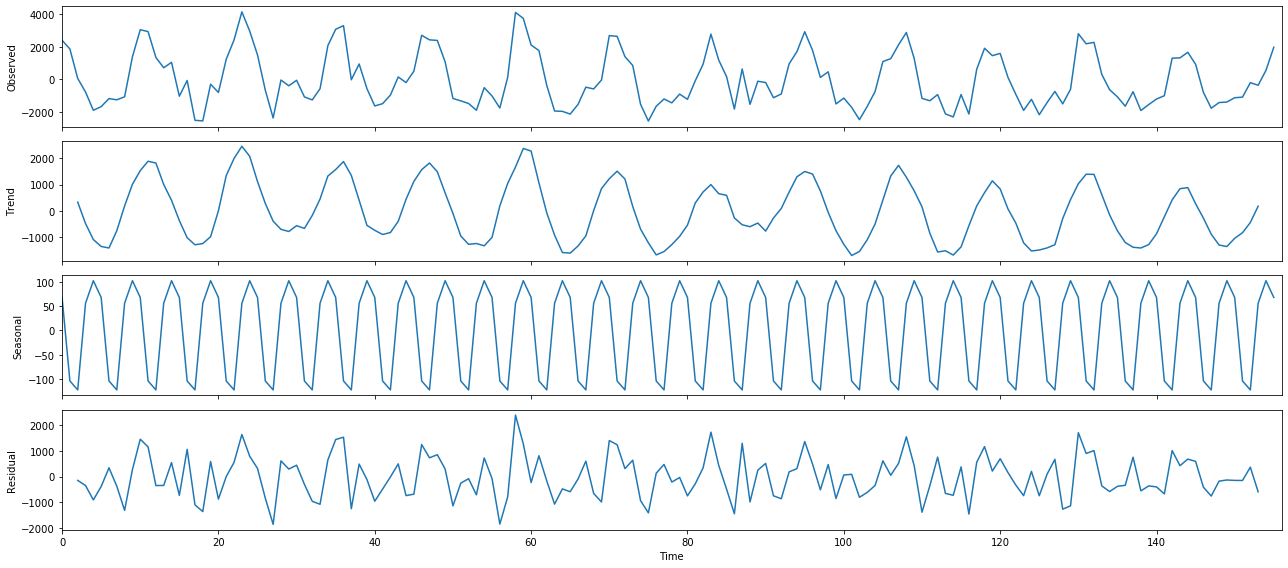

In [34]:
# Trend Seasonality Noise
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(np.asarray(data2), freq=5, model='additive')
fig = decomposition.plot()
plt.show()

In [35]:
import warnings
import itertools
import numpy as np

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [36]:
import warnings
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2735.0966203815215
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2450.107489783426
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2386.8768400542967
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2124.421033253062
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2386.9555205630163
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2323.4820789213327
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2171.1494125839245
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2126.2266640759144
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2642.64981556535
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2399.632901118771
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2370.38903356663
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2106.981848011649
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2384.593048564203
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2309.4732116440323
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2170.8597086093396
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2108.9783114197653
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2647.7578715045156
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2422.909183152548
AR

In [37]:
#ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2111.704215557639
mod = sm.tsa.statespace.SARIMAX(data2,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0001      1.130     -0.885      0.376      -3.214       1.214
ma.S.L12      -1.0143      1.071     -0.947      0.344      -3.114       1.085
sigma2      4.871e+05   2.42e-06   2.01e+11      0.000    4.87e+05    4.87e+05


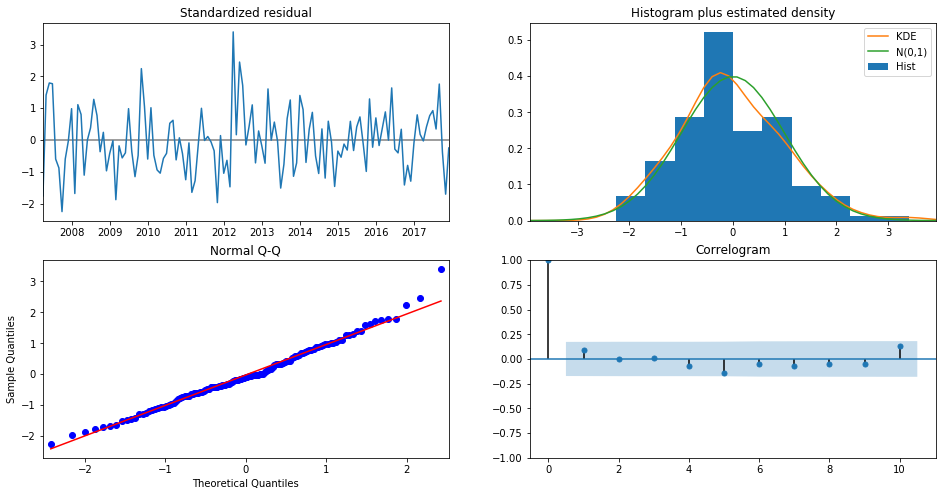

In [46]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('../results/seasonality.png')

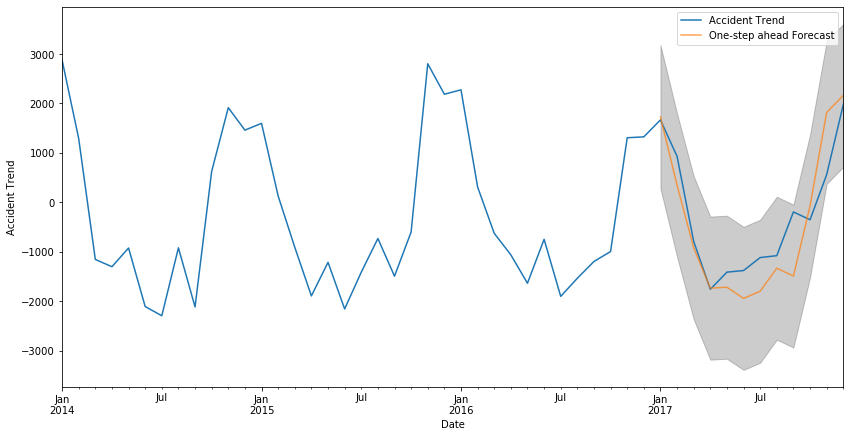

In [47]:
pred = results.get_prediction(start=pd.to_datetime('2017-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data2['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Accident Trend')
plt.legend()
plt.savefig('../results/forecast.png', bbox_inches='tight')